# 凯利公式与扔骰子

## 本文以扔硬币为例，在给定概率和盈亏比情况下，通过模拟验证了根据凯利公式确定的下注比率为最优。

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab
import datetime
from collections import defaultdict
import scipy.stats as stats
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline

### 凯利公式 $f = \frac{b·p - q}{b}$

### 用户参数设置

In [2]:
# b为赔率
b = 1.001
# p为猜对的概率
p = 0.52
# q为猜错的概率
q = 1-p
# N为总模拟次数
N = 1000
# Nround为每次模拟掷硬币的次数
Nround = 10000
# 初始资金
init_balance = 10000

In [3]:
# 根据凯利公式计算最优下注比率
optimalRatio = (b * p - q)/b

ratio_list = [optimalRatio / 4.0, optimalRatio/ 2.0, optimalRatio*2.0, optimalRatio*4.0]
#ratio_list = np.delete(ratio_list, [int(3.0-1)])

optimal_balance = np.zeros(Nround + 1)
ratio_balance = {}
for tmpratio in ratio_list:
    ratio_balance[tmpratio] = np.zeros(Nround + 1)

optimalbalance = []

In [4]:
for i in range(N):
#     print i
    # 生成随机数
    draws = np.random.uniform(0, 1, Nround)

    # 初始资金
    cur_balance = init_balance
    balance_list = [init_balance]

    # balance_dic保存不同ratio下的资金
    balance_dic = defaultdict(list)
    for tmpratio in ratio_list:
        balance_dic[tmpratio].append(init_balance)

    for draw in draws:
        if draw <= p:
            # 猜对
            cur_balance += cur_balance * optimalRatio * b
            balance_list.append(cur_balance)
            for tmpratio in ratio_list:
                tmpbalance = balance_dic[tmpratio][-1]
                tmpbalance += tmpbalance * tmpratio * b
                balance_dic[tmpratio].append(tmpbalance)
        else:
            # 猜错
            cur_balance -= cur_balance * optimalRatio
            balance_list.append(cur_balance)
            for tmpratio in ratio_list:
                tmpbalance = balance_dic[tmpratio][-1]
                tmpbalance -= tmpbalance * tmpratio
                balance_dic[tmpratio].append(tmpbalance)
    
#     print balance_list[-1]
    
    optimal_balance += np.array(balance_list)

    for tmpratio in ratio_list:
        ratio_balance[tmpratio] += np.array(balance_dic[tmpratio])
#         print balance_dic[tmpratio][-1]

optimal_balance /= N
for tmpratio in ratio_list:
    ratio_balance[tmpratio] /= N

In [5]:
# 设置画图颜色
colormap = [(31, 119, 180) , (174, 199, 232) , (255, 127, 14)  , (255, 187, 120), 
            (44, 160, 44)  , (152, 223, 138) , (148, 103, 189) , (197, 176, 213), 
            (214, 39, 40)  , (255, 152, 150) , (140, 86, 75)   , (196, 156, 148),  
            (227, 119, 194), (247, 182, 210) , (127, 127, 127) , (199, 199, 199),  
            (188, 189, 34) , (219, 219, 141) , (23, 190, 207)  , (158, 218, 229)]  

for i in range(len(colormap)):  
    r, g, bb = colormap[i]  
    colormap[i] = (r / 255., g / 255., bb / 255.)  

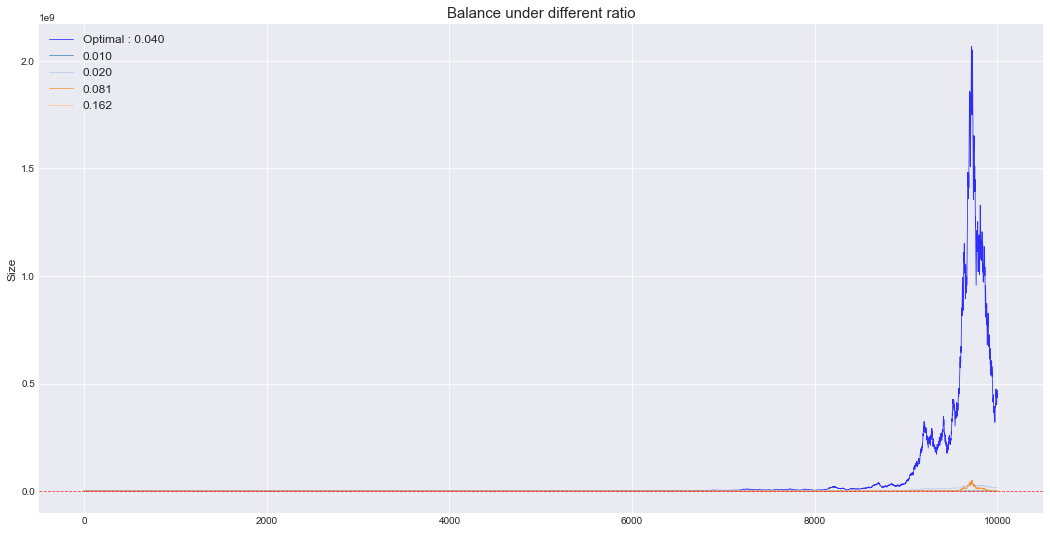

In [6]:
# 画图
fig, ax1 = plt.subplots(figsize=(18, 9))
ax1.plot(balance_list, color = 'blue', label = 'Optimal : %.3f' % optimalRatio, linewidth = 0.8, alpha = 0.8)
for i in range(len(ratio_list)):
    ax1.plot(balance_dic[ratio_list[i]], color = colormap[i], label = '%.3f' % ratio_list[i], linewidth = 0.8, alpha = 0.8)
ax1.axhline(y = init_balance, color = 'red', linestyle = '--', linewidth = 0.8, alpha = 0.8)
ax1.set_ylabel('Size', fontsize = 12)
#ax1.set_yscale("log")
plt.legend(fontsize = 12)
# ax2 = ax1.twinx()
# ax2.plot(dateList, closeArray, color = 'red')
# ax2.set_ylabel('Price')
# plt.axvline(Nround / 5., c='k', ls='--')
plt.title('Balance under different ratio', fontsize=15)
plt.show()